In [1]:
import os
import math

import numpy as np
import seaborn as sns

from statistics import mode
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from sklearn.model_selection import KFold



In [2]:
from keras.datasets import mnist
import tensorflow as tf


Task 1.1 Import your own dataset
----------------------------------
----------------------------------

We imported our own dataset with 25 pictures. Here we use the following box to take the data and implement it into an array

In [3]:
#load images
imageDir = "dataset/all"
localImages = []
for filename in os.listdir(imageDir):
    localImage = mpimg.imread(os.path.join(imageDir, filename))
    if (filename is not None):
        localImages.append(localImage)
        
localImages = np.array(localImages)

#selecting only a subset of the images
X = localImages[:20]
print (X.shape)


(20, 960, 640, 3)


In [4]:
#reshape the array to have flat image data with one image per row
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print (X.shape)

(20, 1843200)


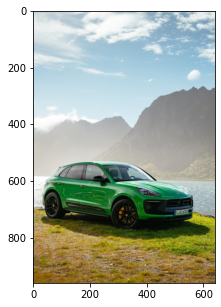

In [5]:
def plotImage(X):
    plt.figure(figsize=(5, 5))
    plt.imshow(X.reshape(960,640,3))
    plt.show()
    plt.close()

plotImage(X[12, :])


(20, 20) (20,)
min: 0.0
max: 1.0


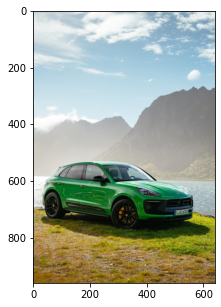

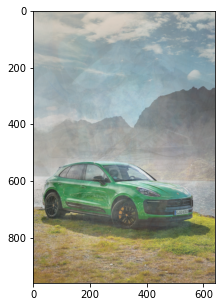

In [6]:
X_norm = X / 255.

X_norm = X_norm - X_norm.mean(axis=0)

cov = np.cov(X_norm, rowvar=True)

U,S,V = np.linalg.svd(cov)
print (U.shape, S.shape)

epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm)

X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print ('min:', X_ZCA_rescaled.min())
print ('max:', X_ZCA_rescaled.max())

plotImage(X[12, :])
plotImage(X_ZCA_rescaled[12, :])


Task 1.2 Import somebody’s else dataset
---------------------------------------
---------------------------------------

This took about 3 hours I believe

In [7]:
test_datavalue = 'vecs.npy'

path = tf.keras.utils.get_file('mnist.npz', test_datavalue)
with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']

train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

print(train_examples.shape)
print(test_examples.shape)


(60000, 28, 28)
(10000, 28, 28)


In [8]:
data = np.load("dataset/1.2/vecs.npy",allow_pickle = True)
parts = ["1_pos"]
dict = data.item()
labels = []
embeddings = []

def createNumpyArrayFromDict(pos):
    for l in dict[pos]:
        for e in dict[pos][l]:
            labels.append(l)
            embeddings.append(e)

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

for part in parts:
    createNumpyArrayFromDict(part)

numpy_embed = np.array(embeddings)
numpy_labels = np.array(labels)

numpy_labels, numpy_embed = unison_shuffled_copies(numpy_labels, numpy_embed)

print(numpy_labels)
print(numpy_embed)

print(len(numpy_embed))
print(len(numpy_labels))


[8 8 2 ... 2 0 0]
[[-0.       -0.        8.606657 ... -0.       -0.       -0.      ]
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]
 [-0.       -0.        0.       ... -0.       -0.       -0.      ]
 ...
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]]
1258
1258


2.1
-----------------------------
------------------------------

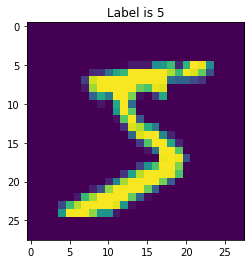

In [9]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

Image=Xtr[0,:,:]
Label=Ltr[0]

plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()

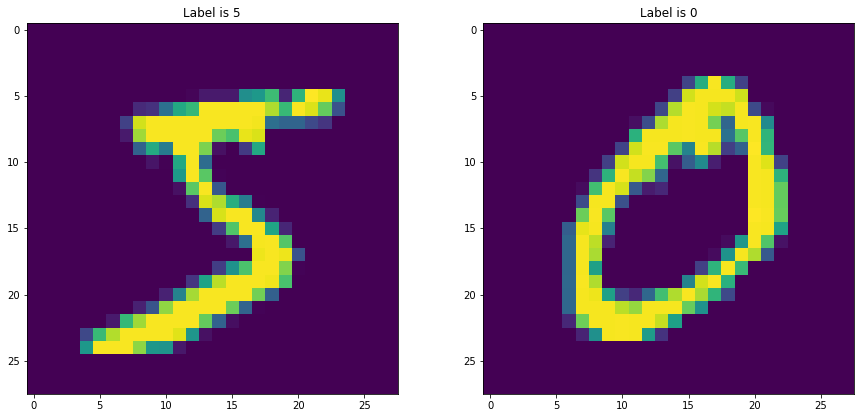

In [10]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]

ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)

plt.show()
plt.close()

In [11]:
28*28

784

In [12]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]) <-- Buged code

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype(int) # <-- Fixed code by adding .astype(int)
Tr_set.shape

(500, 784)

In [13]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        #distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1) #L1 norm uses np.abs 
        distances=np.sqrt(np.sum(np.square(np.abs(Tr_set-X[i,:])),axis=1)) #L2 norm uses np.square
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [14]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))

Accuracy: 0.8294


1: L1 norm accuracy: 0.2649
2: L2 norm accuracy: 0.19
3: L1 norm accuracy: 0.811 & L2 norm accuracy: 0.8294 & "Bug in the code": added .astype(int) at the reshape of the training set (changes the data type from uint8 that can only handle positive numbers to int32 that can handle positive and negative)


2.1.4
------------------

In [15]:


def predictK(X, k):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(0,num_test):
        distances=np.sqrt(np.sum(np.square(np.abs(Tr_set-X[i,:])),axis=1))
        
        min_index= np.argsort(distances)[:k]
        Lpred[i]=mode(Ltr_set[min_index])

    return Lpred

In [16]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted_k=predictK(Test_images, 1)

print("Accuracy:", np.mean(Labels_predicted_k==L_test))

Accuracy: 0.8294


2.1.4: Accuracy: 0.8294 for k = 1

2.2 Hyperparameters, cross-validation
-------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

Part 1

In [17]:
def predictCrossKNN(val_data,train_data,trainL,k):
    num_test=val_data.shape[0]
    
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    for i in range(num_test):
        #distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        distances=np.sqrt(np.sum(np.square(np.abs(train_data-val_data[i,:])),axis=1))
        
        k_closest = np.argsort(distances)[:k]

        Lpred[i]=mode(trainL[k_closest])
    return Lpred

In [18]:
def randomData():
    num_sample=500
    random_train_data, random_label_data = unison_shuffled_copies(Xtr,Ltr)
    Tr_set_random=random_train_data[:num_sample,:,:]
    Ltr_set_random=random_label_data[:num_sample]
    #Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

    Tr_set_random=Tr_set_random.reshape(num_sample,Tr_set_random.shape[1]*Tr_set_random.shape[2]).astype(int)
    Tr_set_random.shape
    return Tr_set_random, Ltr_set_random
    


In [19]:
def crossValidationKNN(train_data, train_label, fold):

    kfold = KFold(n_splits=fold)
    ac = []
    k_ac = []

    for k in range(1,10):
        for train, val in kfold.split(train_data):
            train_set = train_data[train]
            val_set = train_data[val]

            train_label_set = train_label[train]
            val_label_set = train_label[val]

            label_predict = predictCrossKNN(val_set, train_set, train_label_set, k)
            ac.append(np.mean(label_predict==val_label_set))
        
        ac_mean = np.mean(ac)
        k_ac.append(ac_mean)
        
    return(k_ac)


In [20]:
best_k_value = []
fold = 3
for i in range(1,20):  
    T_Data,L_data = randomData()
    k_ac=crossValidationKNN(T_Data,L_data,fold)
    best_k_value.append(np.argmax(k_ac)+1)

print(best_k_value)

[6, 1, 1, 6, 5, 4, 1, 5, 1, 3, 3, 1, 1, 1, 1, 8, 1, 1, 2]


In [21]:
value = Counter(best_k_value)
value.most_common(1)[0][0]
print( value.most_common(1)[0][0])

1


In [22]:
final_Acc = []
acc_value = predictK(Test_images, value.most_common(1)[0][0])
final_Acc.append(np.mean(acc_value==L_test))
print('The best K value is ',value.most_common(1)[0][0], ", which is the acc value" , final_Acc[0])

The best K value is  1 , which is the acc value 0.8294


Task 3.1 Support Vector Machines
--------------------------------------------
--------------------------------------------

The kernal which we for the most times got the best acc for was the linear kernel, sometimes polynomial but mostly linear

In [36]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, f1_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [37]:
# import some data to play with
iris = load_iris()

X = iris.data[:,:4] #All features
y = iris.target
feature_names = iris.feature_names[:4]
classes = iris.target_names

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [38]:
# we create an instance of SVM and fit out data. (OvR: one-vs-rest & OvO: one-vs-one)
linear_OvO = SVC(kernel='linear', decision_function_shape="ovr").fit(X_train, Y_train)
poly_OvO = SVC(kernel='poly', decision_function_shape="ovr").fit(X_train, Y_train)
rbf_OvO = SVC(kernel='rbf', decision_function_shape="ovr").fit(X_train, Y_train)

linear_OvR = SVC(kernel='linear', decision_function_shape="ovo").fit(X_train, Y_train)
poly_OvR = SVC(kernel='poly', decision_function_shape="ovo").fit(X_train, Y_train)
rbf_OvR = SVC(kernel='rbf', decision_function_shape="ovo").fit(X_train, Y_train)

In [40]:
# titles for the plots
titles = ['linear kernel (OVR)', 'polynomial kernel (OVR)', 'RBF kernel (OVR)', 'linear kernel(OVO)', 'polynomial kernel (OVO)', 'RBF kernel (OVO)']

for i, clf in enumerate((linear_OvO, poly_OvO, rbf_OvO, linear_OvR, poly_OvR, rbf_OvR)):
    
    pred = clf.predict(X_test)
    f1 = f1_score(Y_test, pred, average='weighted')
    print(titles[i],"has accuracy", np.mean(pred==Y_test), "\n with a F1 score of: ", f1, "\n")

    #plot_confusion_matrix(clf, X_test, Y_test, display_labels=classes, cmap=plt.cm.Blues, normalize=None)
    #plt.title(titles[i])
    matrix = confusion_matrix(pred, Y_test)
    print(matrix)#.confusion_matrix)


linear kernel (OVR) has accuracy 1.0 
 with a F1 score of:  1.0 

[[10  0  0]
 [ 0  8  0]
 [ 0  0 12]]
polynomial kernel (OVR) has accuracy 0.9666666666666667 
 with a F1 score of:  0.96692242114237 

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
RBF kernel (OVR) has accuracy 0.9666666666666667 
 with a F1 score of:  0.96692242114237 

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
linear kernel(OVO) has accuracy 1.0 
 with a F1 score of:  1.0 

[[10  0  0]
 [ 0  8  0]
 [ 0  0 12]]
polynomial kernel (OVO) has accuracy 0.9666666666666667 
 with a F1 score of:  0.96692242114237 

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
RBF kernel (OVO) has accuracy 0.9666666666666667 
 with a F1 score of:  0.96692242114237 

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


Part 3.1.3 / 3.1.4
------------------

In [27]:
clf = SVC(kernel='linear',decision_function_shape='ovr')
clf.fit(X_train, Y_train)
w = clf.coef_[0]

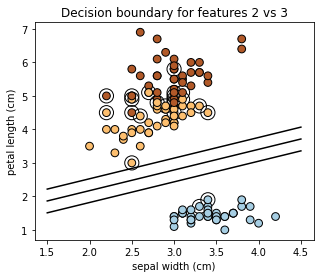

blue
[3.3 1.7]
[3.4 1.9]
yellow
[3.  4.5]
[2.9 4.7]
[2.5 3. ]
[3.1 4.9]
[3. 5.]
[2.5 4.9]
[2.2 4.5]
[2.6 4.4]
[3.3 4.7]
[3.4 4.5]
[2.7 5.1]
red
[2.2 5. ]
[2.5 5. ]
[2.8 4.8]
[3.  4.9]
[3.1 5.1]
[3.  5.8]
[2.5 4.5]
[3.  4.8]
[3.  5.1]


In [28]:
#2vs3 decision boundry

# get the separating hyperplane
a = -w[1] / w[2]
xx = np.linspace(1.5, 4.5)
yy = a * xx - (clf.intercept_[0]) / w[2]

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(1, figsize=(5, 4))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")

plt.scatter(clf.support_vectors_[:, 1], clf.support_vectors_[:, 2], s=200, facecolors="none", zorder=10, edgecolors="k")
plt.scatter(X_train[:, 1], X_train[:, 2], c=Y_train, zorder=10, s=60, cmap=plt.cm.Paired, edgecolors="k")
plt.xlabel(feature_names[1])
plt.ylabel(feature_names[2])
plt.title("Decision boundary for features 2 vs 3")
plt.show()

i = 0
print("blue")
for j in range(clf.n_support_[0]):
    print(clf.support_vectors_[i][1:3])
    i += 1

print("yellow")
for j in range(clf.n_support_[1]):
    print(clf.support_vectors_[i][1:3])
    i += 1
    
print("red")
for j in range(clf.n_support_[2]):
    print(clf.support_vectors_[i][1:3])
    i += 1


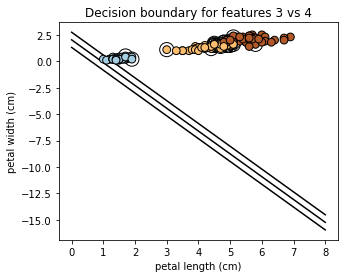

blue
[1.7 0.5]
[1.9 0.2]
yellow
[4.5 1.5]
[4.7 1.4]
[3.  1.1]
[4.9 1.5]
[5.  1.7]
[4.9 1.5]
[4.5 1.5]
[4.4 1.2]
[4.7 1.6]
[4.5 1.6]
[5.1 1.6]
red
[5.  1.5]
[5.  1.9]
[4.8 1.8]
[4.9 1.8]
[5.1 2.3]
[5.8 1.6]
[4.5 1.7]
[4.8 1.8]
[5.1 1.8]


In [29]:
#3vs4 decision boundry

#get the separating hyperplane
a = -w[2] / w[3]
xx = np.linspace(0, 8)
yy = a * xx - (clf.intercept_[0]) / w[3]

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin 
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(1, figsize=(5, 4))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")

plt.scatter(clf.support_vectors_[:, 2], clf.support_vectors_[:, 3], s=200, facecolors="none", zorder=10, edgecolors="k")
plt.scatter(X_train[:, 2], X_train[:, 3], c=Y_train, zorder=10, s=60, cmap=plt.cm.Paired, edgecolors="k")
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.title("Decision boundary for features 3 vs 4")
plt.show()

i = 0
print("blue")
for j in range(clf.n_support_[0]):
    print(clf.support_vectors_[i][2:4])
    i += 1

print("yellow")
for j in range(clf.n_support_[1]):
    print(clf.support_vectors_[i][2:4])
    i += 1
    
print("red")
for j in range(clf.n_support_[2]):
    print(clf.support_vectors_[i][2:4])
    i += 1